In [33]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
crypto_df = pd.read_csv(
    Path("/Users/samibsata/Desktop/crypto_clustering/Resources/crypto_market_data.csv"),
    index_col='coin_id'    
)

crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [35]:
crypto_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [36]:
crypto_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [37]:
model = StandardScaler()
scaled_crypto = model.fit_transform(crypto_df)

print(scaled_crypto[0:5])

[[ 0.50852937  0.49319307  0.77220043  0.23545963 -0.0674951  -0.35595348
  -0.25163688]
 [ 0.18544589  0.93444504  0.55869212 -0.05434093 -0.27348273 -0.11575947
  -0.19935211]
 [ 0.02177396 -0.70633685 -0.02168042 -0.06103015  0.00800452 -0.55024692
  -0.28206051]
 [-0.04076438 -0.81092807  0.24945797 -0.05038797 -0.37316402 -0.45825882
  -0.29554614]
 [ 1.19303608  2.00095907  1.76061001  0.54584206 -0.29120287 -0.49984776
  -0.27031695]]


In [38]:
scaled_crypto_df = pd.DataFrame(scaled_crypto, columns=["price_change_24h", "price_change_7d", "price_change_14d", "price_change_30d", "price_change_60d", "price_change_200d", "price_change_1y"])

scaled_crypto_df = scaled_crypto_df.set_index(crypto_df.index)

scaled_crypto_df.head()


,price_change_24h,price_change_7d,price_change_14d,price_change_30d,price_change_60d,price_change_200d,price_change_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [46]:
k = list(range(1,11))
inertia = []

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_crypto_df)
    inertia.append(k_model.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

elbow_curve = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    xticks=k
)

elbow_curve

:Curve   [k]   (inertia)

In [40]:
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


## Determining the k value/elbow point

In [41]:
# First way is to find the point on the elbow curve that is the furthest from a straight
# line between the inertia end points
endpoints = df_elbow.iloc[[0,-1]].hvplot.line(
    x = "k",
    y = "inertia",
    xticks = k
)

elbow_curve * endpoints

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

Elbow at k = 4


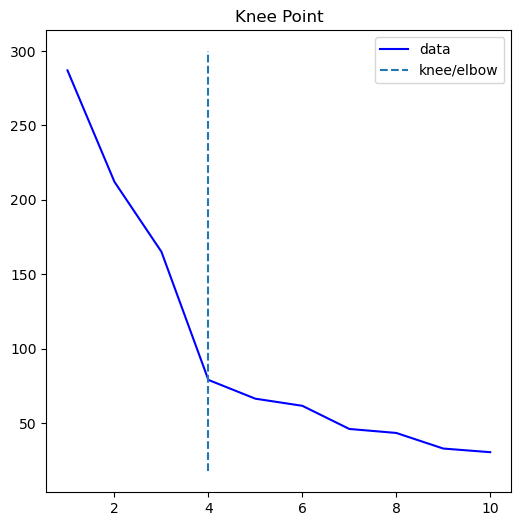

In [56]:
# Second way is to use kneed library to have it determine it for you

from kneed import KneeLocator

knee_point = KneeLocator(k, inertia, curve="convex", direction="decreasing")
print("Elbow at k =", knee_point.knee)

knee_point.plot_knee()

### The best value for k is 4

In [21]:
model = KMeans(n_clusters=4, random_state=1)

model.fit(scaled_crypto_df)

crypto_data = model.predict(scaled_crypto_df)
print(crypto_data)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
predicted_crypto_df = scaled_crypto_df.copy()
predicted_crypto_df['predicted_crypto'] = crypto_data

predicted_crypto_df.head()

,price_change_24h,price_change_7d,price_change_14d,price_change_30d,price_change_60d,price_change_200d,price_change_1y,predicted_crypto
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [65]:
crypto_cluster=predicted_crypto_df.hvplot.scatter(
    x="price_change_24h",
    y="price_change_7d",
    by="predicted_crypto",
    hover_cols = ['coin_id']
)

crypto_cluster

:NdOverlay   [predicted_crypto]
   :Scatter   [price_change_24h]   (price_change_7d,coin_id)

In [ ]:
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(scaled_crypto_df)
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [29]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [30]:
sum(pca.explained_variance_ratio_)

0.8950316570309842

### The total explained variance is 0.89

In [ ]:
crypto_pca_df = pd.DataFrame(crypto_pca, columns=['PCA1', 'PCA2', 'PCA3'])
crypto_pca_df = crypto_pca_df.set_index(scaled_crypto_df.index)
crypto_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [54]:
k_2 = list(range(1,11))
inertia_2 = []

for i in k_2:
    pca_k_model = KMeans(n_clusters=i, random_state=1)
    pca_k_model.fit(crypto_pca_df)
    inertia_2.append(pca_k_model.inertia_)

pca_elbow_data = {"k":k_2, "inertia":inertia_2}
pca_elbow_df = pd.DataFrame(pca_elbow_data)

pca_elbow_curve = pca_elbow_df.hvplot.line(
    x='k',
    y='inertia',
    xticks = k_2
)

pca_elbow_curve

:Curve   [k]   (inertia)

Elbow at k = 4


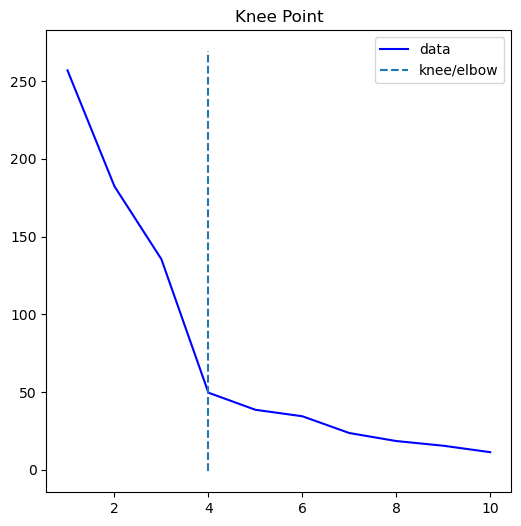

In [57]:
pca_knee_point = KneeLocator(k_2, inertia_2, curve="convex", direction="decreasing")
print("Elbow at k =", pca_knee_point.knee)

pca_knee_point.plot_knee()

### The optimal k-value is 4
### It does not differ from the original data

In [ ]:
model =KMeans(n_clusters=4, random_state=1)
model.fit(crypto_pca_df)
pca_crypto_predicted = model.predict(crypto_pca_df)
pca_crypto_predicted

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [60]:
pca_crypto_predicted_df = crypto_pca_df.copy()
pca_crypto_predicted_df['pca_prediction'] = pca_crypto_predicted
pca_crypto_predicted_df.head()

,PCA1,PCA2,PCA3,pca_prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [63]:
pca_cluster = pca_crypto_predicted_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='pca_prediction',
    hover_cols=['coin_id']
)
pca_cluster

:NdOverlay   [pca_prediction]
   :Scatter   [PCA1]   (PCA2,coin_id)

In [69]:
(crypto_cluster + pca_cluster).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_crypto]
      :Scatter   [price_change_24h]   (price_change_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_prediction]
      :Scatter   [PCA1]   (PCA2,coin_id)

In [73]:
print(f"Original Inertia: {k_model.inertia_:.2f}")
print(f"PCA Inertia: {pca_k_model.inertia_:.2f}")

elbow_curve * pca_elbow_curve

Original Inertia: 30.47
PCA Inertia: 11.41


:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

### After visually comparing both the cluster and elbow graphs I am able to identify that the impact of using fewer features has helped focus the data on what is relevent 